# Deep Learning: Classification using Keras for Breast Cancer 

Dataset: Wisconsin Study for Breast Cancer (https://goo.gl/U2Uwz2)


**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/cancer_classification.csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Data Visualisation

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

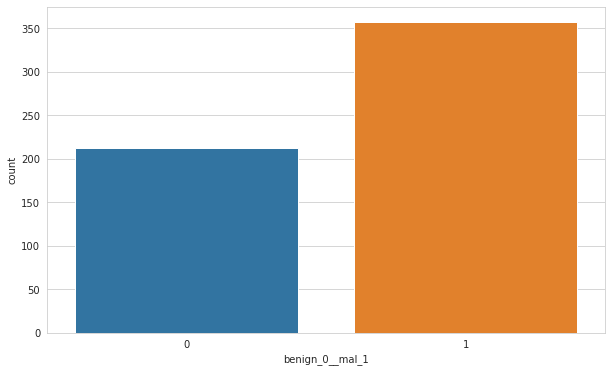

In [14]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.countplot(data=df,x="benign_0__mal_1")

<AxesSubplot:>

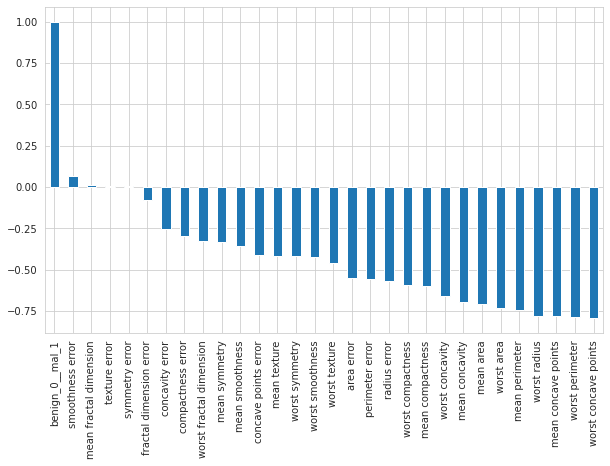

In [17]:
plt.figure(figsize=(10,6))
df.corr()["benign_0__mal_1"][1:].sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:>

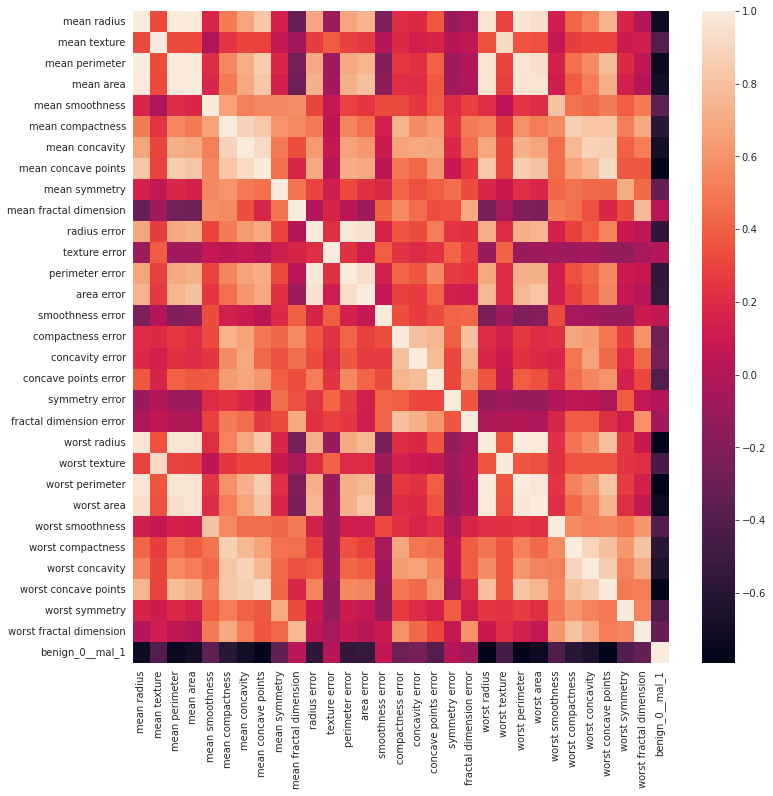

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

## Model Training

In [19]:
X = df.drop("benign_0__mal_1",axis=1).values
y = df["benign_0__mal_1"].values

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [62]:
X_train = scaler.fit_transform(X_train)

In [63]:
X_test = scaler.transform(X_test)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [65]:
X_train.shape

(426, 30)

In [66]:
model = Sequential()

model.add((Dense(30,activation="relu")))

model.add((Dense(15,activation="relu")))

# Binary Classification therefore activation function is sigmoid
model.add((Dense(1,activation="sigmoid")))

model.compile(loss="binary_crossentropy",optimizer="adam")

We are intentionally attempting to overfit the model into the dataset, to study how we can overcome this.

In [67]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6798 - val_loss: 0.6511
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6394 - val_loss: 0.6144
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6044 - val_loss: 0.5814
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5700 - val_loss: 0.5467
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5308 - val_loss: 0.5051
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4857 - val_loss: 0.4556
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4350 - val_loss: 0.4018
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3834 - val_loss: 0.3510
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3394 - val_loss: 0.3078
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3009 - val_loss: 0.2739
Epoch 11

14/14 [==============================] - 0s 8ms/step - loss: 0.0542 - val_loss: 0.1028
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0503 - val_loss: 0.1034
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0495 - val_loss: 0.0957
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.0996
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0497 - val_loss: 0.1005
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0486 - val_loss: 0.0990
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0496 - val_loss: 0.0965
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0507 - val_loss: 0.0997
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0510 - val_loss: 0.1034
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0489 - val_loss: 0.1016
Epoch 93/600


14/14 [==============================] - 0s 5ms/step - loss: 0.0341 - val_loss: 0.1068
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0359 - val_loss: 0.1027
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0339 - val_loss: 0.1014
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0373 - val_loss: 0.1037
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0362 - val_loss: 0.1058
Epoch 169/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0341 - val_loss: 0.1086
Epoch 170/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0330 - val_loss: 0.1119
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0343 - val_loss: 0.1079
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0331 - val_loss: 0.1041
Epoch 173/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.1080
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0262 - val_loss: 0.1107
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0254 - val_loss: 0.1165
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0250 - val_loss: 0.1087
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0253 - val_loss: 0.1117
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 0.1094
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.1138
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0255 - val_loss: 0.1071
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0248 - val_loss: 0.1143
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0251 - val_loss: 0.1132
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0257 - val_loss: 0.1157
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0205 - val_loss: 0.1323
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0208 - val_loss: 0.1485
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0190 - val_loss: 0.1336
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.1330
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.1375
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0207 - val_loss: 0.1498
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.1299
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.1404
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.1286
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0196 - val_loss: 0.1349
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0141 - val_loss: 0.1653
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.1825
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.1585
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.1667
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0142 - val_loss: 0.1630
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0139 - val_loss: 0.1668
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.1633
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0125 - val_loss: 0.1658
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.1660
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.1666
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.2250
Epoch 489/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0093 - val_loss: 0.2171
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.2246
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.2239
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.2191
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0108 - val_loss: 0.2201
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.2181
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.2313
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.2307
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.2200
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.2873
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 0.2793
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0122 - val_loss: 0.2956
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0064 - val_loss: 0.2827
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.2820
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.3150
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.2722
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0103 - val_loss: 0.3063
Epoch 577/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.2710
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.2844
Epoc

In [68]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.679828,0.651083
1,0.639355,0.614377
2,0.604403,0.581421
3,0.569957,0.546706
4,0.530800,0.505068


<AxesSubplot:>

<Figure size 864x864 with 0 Axes>

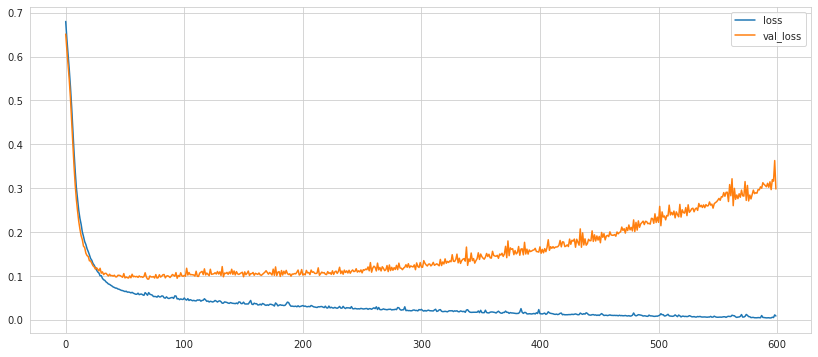

In [69]:
plt.figure(figsize=(12,12))
losses.plot(figsize=(14,6))

Classic overfitting!

## Using Keras Callbacks to prevent overfitting

In [71]:
model = Sequential()

model.add((Dense(30,activation="relu")))

model.add((Dense(15,activation="relu")))

# Binary Classification therefore activation function is sigmoid
model.add((Dense(1,activation="sigmoid")))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [74]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6831 - val_loss: 0.6573
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6475 - val_loss: 0.6274
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6164 - val_loss: 0.5944
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5826 - val_loss: 0.5570
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5435 - val_loss: 0.5121
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4971 - val_loss: 0.4623
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4496 - val_loss: 0.4132
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4023 - val_loss: 0.3720
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3603 - val_loss: 0.3297
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3267 - val_loss: 0.2963
Epoch 11

<AxesSubplot:>

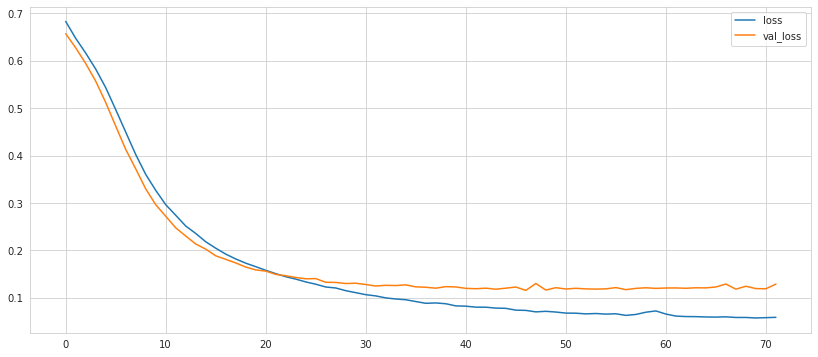

In [75]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(14,6))

## Using keras Dropout
This is used to drop a percentage of layers during fitting

In [56]:
from tensorflow.keras.layers import Dropout

In [76]:
model = Sequential()

model.add((Dense(30,activation="relu")))
model.add(Dropout(0.5))

model.add((Dense(15,activation="relu")))
model.add(Dropout(0.5))

# Binary Classification therefore activation function is sigmoid
model.add((Dense(1,activation="sigmoid")))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [77]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 21ms/step - loss: 0.7116 - val_loss: 0.6374
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6744 - val_loss: 0.6165
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6555 - val_loss: 0.5950
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6111 - val_loss: 0.5687
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5838 - val_loss: 0.5398
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5836 - val_loss: 0.5165
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5471 - val_loss: 0.4865
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5282 - val_loss: 0.4545
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5002 - val_loss: 0.4268
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4652 - val_loss: 0.4008
Epoch

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0897 - val_loss: 0.0936
Epoch 84/600
14/14 [==============================] - 0s 12ms/step - loss: 0.1259 - val_loss: 0.1033
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1115 - val_loss: 0.1113
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1124 - val_loss: 0.0937
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0947 - val_loss: 0.0995
Epoch 88/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1004 - val_loss: 0.1023
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1095 - val_loss: 0.0912
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1166 - val_loss: 0.0945
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0958 - val_loss: 0.1151
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1032 - val_loss: 0.1026

<AxesSubplot:>

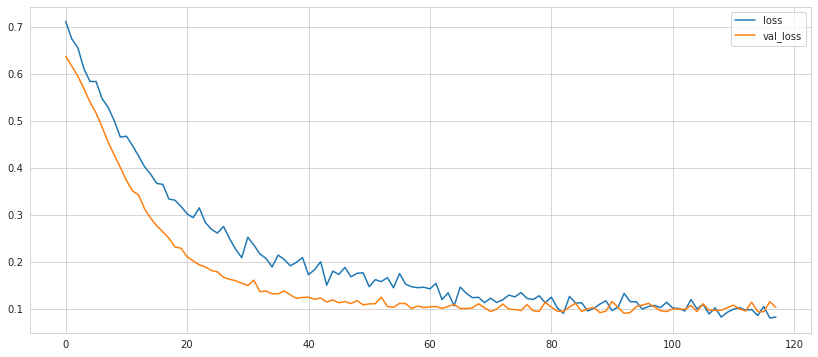

In [78]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(14,6))

In [96]:
X_test

array([[0.26317335, 0.29861346, 0.2461044 , ..., 0.29010309, 0.27951902,
        0.11025843],
       [0.34536915, 0.21203923, 0.32136119, ..., 0.25611684, 0.22866154,
        0.11347239],
       [0.29008269, 0.22387555, 0.27070086, ..., 0.28298969, 0.28760103,
        0.09477896],
       ...,
       [0.51954597, 0.46060196, 0.52553979, ..., 0.68591065, 0.14508181,
        0.44182081],
       [0.22696805, 0.28643896, 0.22772692, ..., 0.48659794, 0.21584861,
        0.24701561],
       [0.41680121, 0.38451133, 0.41303892, ..., 0.73333333, 0.28346146,
        0.32638069]])

In [99]:
# model.predict_classes(X_test) was removed in TensorFlow 2.6
predict_data_classified = np.round(model.predict(X_test)).astype(int)
print(predict_data_classified)

5/5 [==============================] - 0s 2ms/step
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]


In [101]:
y_test.shape

(143,)

In [100]:
predict_data_classified.shape

(143, 1)

In [102]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predict_data_classified))
print(confusion_matrix(y_test,predict_data_classified))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 3 85]]
